# Practice Notebook for Data Visualization with Python Course work
## About the Dataset
In this workspace, you'll be working with the dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in this [GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

## Univariate Exploration of Data

### Bar Charts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pokemon = pd.read_csv("pokemon.csv")

In [3]:
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


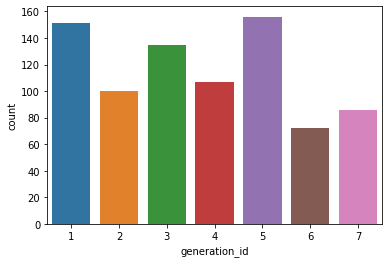

In [4]:
sns.countplot(data=pokemon, x='generation_id');

In [5]:
# obtaining color palette()
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [6]:
# getting the first color as our base color
base_color = sns.color_palette()[0]

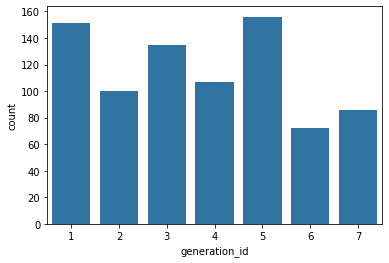

In [7]:
sns.countplot(data=pokemon, x='generation_id', color=base_color);

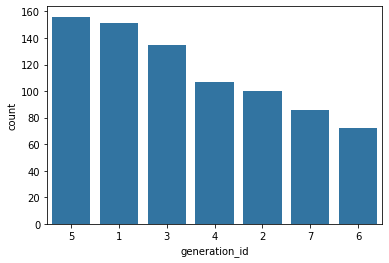

In [8]:
# sorting by number of pokemons introduced in each generation.
order_gen = pokemon.generation_id.value_counts().index
sns.countplot(data=pokemon, x='generation_id',
              color=base_color, order=order_gen);

* type_1 = offensive capabilites
* type_2 = defensive capabilities

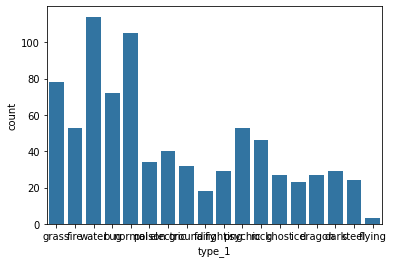

In [9]:
# let's look at the distribution of the offensive capabilities
sns.countplot(data=pokemon, x="type_1",
              color=base_color);

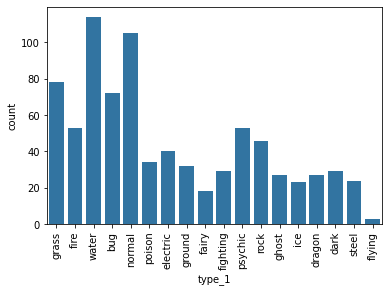

In [10]:
# rotating x ticks
sns.countplot(data=pokemon, x="type_1",
              color=base_color)
plt.xticks(rotation=90);

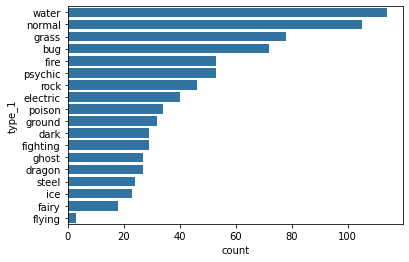

In [11]:
# creating a horizontal barchart instead
order_type1 = pokemon.type_1.value_counts().index
sns.countplot(data=pokemon, y="type_1",
              color=base_color, order=order_type1);

In [12]:
order_type1

Index(['water', 'normal', 'grass', 'bug', 'fire', 'psychic', 'rock',
       'electric', 'poison', 'ground', 'dark', 'fighting', 'ghost', 'dragon',
       'steel', 'ice', 'fairy', 'flying'],
      dtype='object')

#### Absolute vs. Relative Frequency

In [13]:
# let's reshape the pokemon dataframe
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                          value_vars=['type_1','type_2'],
                          var_name='type_level',
                          value_name='type')

pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [14]:
# count the frequency of unique values in the 'type' column of pkmn_types
# dataframe.
type_counts = pkmn_types.type.value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

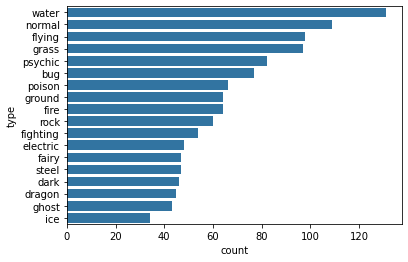

In [15]:
# plot the horizontal bar charts
sns.countplot(data=pkmn_types, y='type',
              order=type_counts.index, color=base_color);

Plot a bar chart having the proportions instead of the actual count on one of the axes.

In [16]:
# Returns the sum of all non-null values in `type` column
n_pokemon = pkmn_types.type.value_counts().sum()

# Return the highest frequency in the `type` column
max_type_count = type_counts[0]

# Compute the length of the longest bar in terms of the proportion
# This will be used as reference when creating uniform xticks
max_prop = max_type_count / n_pokemon
print('max_prop: ', max_prop)

# create a set of evenly spaced proportioned values between 0 and max_prop
# with a step size of 0.02
tick_props = np.arange(0, max_prop, 0.02)
print('tick_props: {}'.format(tick_props))

max_prop:  0.10808580858085809
tick_props: [0.   0.02 0.04 0.06 0.08 0.1 ]


In [17]:
# Use a list comprehension to create tick_names that we will apply to the
# tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a 
# formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` 
# is used to represent floating point number.

tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

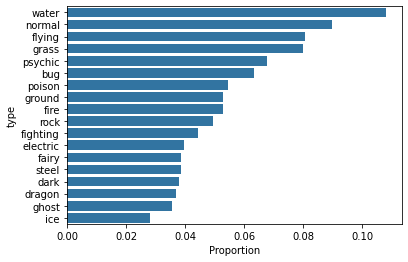

In [18]:
sns.countplot(data=pkmn_types, y='type',
              order=type_counts.index, color=base_color)
# change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('Proportion');

Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

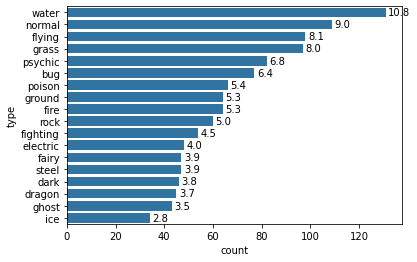

In [19]:
# Printing the text (proportion) on the bars
base_color = sns.color_palette()[0]
sns.countplot(data=pkmn_types, y='type',
              order=type_counts.index, color=base_color)

# logic to print the proportion text on the bars
for i in range(type_counts.shape[0]):
      # type_counts contains the freq of unique values in the `type` 
      # column in decreasing order
      count = type_counts[i]
      
      # convert count into a percentage, and then into string
      pct_string = '{:0.1f}'.format(100*count/n_pokemon)
      
      # print the string value on the bar
      # plt.text(x, y, s, fontdict=None, **kwargs)
      plt.text(count+1, i, pct_string, va='center')

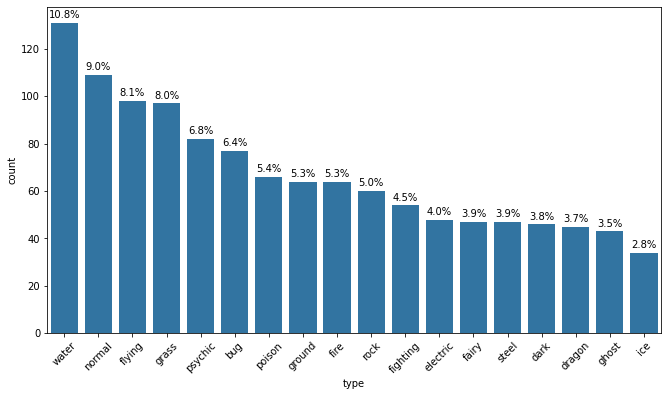

In [20]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sns.color_palette()[0]
plt.figure(figsize=(11,6))
sns.countplot(data=pkmn_types, x='type', color=base_color, order=type_counts.index);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=45) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

#### Bar Chart Practice

**TO DO Task 1**

* Explore the `pokemon` dataframe and try to understand the significance of each of its column.
* There have been quite a few Pokemon introduced over the series' history. Display the count of Pokemon introduced in each generation? Create a bar chart of these frequencies using the `generation_id` column.

In [21]:
pokemon

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,poipole,7,0.6,1.8,189,poison,NaN,67,73,67,73,73,67
803,804,naganadel,7,3.6,150.0,243,poison,dragon,73,73,73,121,127,73
804,805,stakataka,7,5.5,820.0,257,rock,steel,61,131,211,13,53,101
805,806,blacephalon,7,1.8,13.0,257,fire,ghost,53,127,53,107,151,79


In [22]:
pkmn_gen =  pokemon.generation_id.value_counts().sort_index()

In [23]:
pkmn_gen

1    151
2    100
3    135
4    107
5    156
6     72
7     86
Name: generation_id, dtype: int64

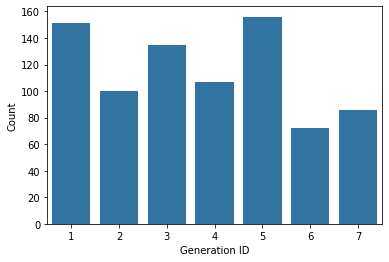

In [24]:
# getting the first color as our base color
base_color = sns.color_palette()[0]

sns.barplot(x=pkmn_gen.index, y=pkmn_gen.values,
            color=base_color)
plt.xlabel('Generation ID')
plt.ylabel('Count');

Since it's a count problem, let's use `sns.countplot()` instead.

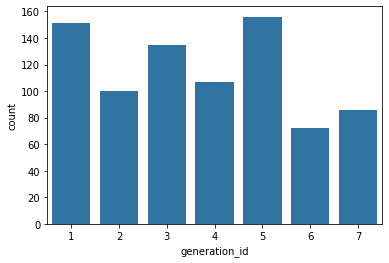

In [25]:
sns.countplot(data=pokemon, x='generation_id',
              color=base_color);

Shorter and more efficient abi?

**TO DO Task 2** 
1. Each Pokémon species has either `type_1`, `type_2` or both `types` that play a part in its offensive and defensive capabilities. The code below creates a new dataframe `pkmn_types` that club the rows of both `type_1` and `type_2`, so that the resulting dataframe has **new** column, `type_level`. 

***Display, how frequent is each type?***

The function below will do the following in the pokemon dataframe *out of place*:
1. Select the 'id', and 'species' columns from pokemon. 
2. Remove the 'type_1', 'type_2' columns from pokemon
3. Add a new column 'type_level' that can have a value either 'type_1' or 'type_2'
4. Add another column 'type' that will contain the actual value contained in the 'type_1', 'type_2' columns. For example, the first row in the pokemon dataframe having `id=1`	and `species=bulbasaur` will now occur twice in the resulting dataframe after the `melt()` operation. The first occurrence will have `type=grass`, whereas, the second occurrence will have `type=poison`.

In [26]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                          value_vars=['type_1', 'type_2'],
                          var_name='type_level',
                          value_name='type')
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [27]:
order_type = pkmn_types.type.value_counts()

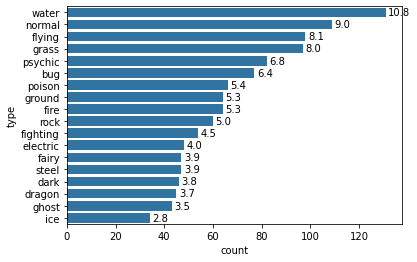

In [28]:
sns.countplot(data=pkmn_types, y='type',
              order=order_type.index,
              color=base_color);

## adding the relative freq to top of bar
# number of pokemons
n_pokemon = order_type.sum()

# iterate x times, where x is the number of unique types
for i in range(order_type.shape[0]):
      # taking the first count value
      count = order_type[i]
      
      # convert count into pct proportion and then into string
      pct_string = '{:0.1f}'.format(100*count/n_pokemon)
      
      # print the string value on the bar
      plt.text(count+1, i, pct_string, va='center')


In [29]:
order_type

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

### Histograms

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <BarContainer object of 10 artists>)

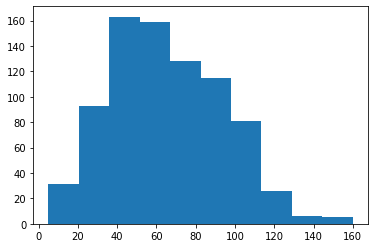

In [30]:
plt.hist(data=pokemon, x='speed')

By default, the `hist` function divides the data into 10 bins, based on the range of values taken. In almost every case, we will want to change these settings.

Usually, having only ten bins is too few to really understand the distribution of the data. And the default tick marks are often not on nice, 'round' values that make the ranges taken by each bin easy to interpret.

You can use descriptive statistics (e.g. via **`dataframe['column'].describe()`**) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's `arange` function:

In [34]:
pokemon.speed.describe()


count    807.000000
mean      65.830235
std       27.736838
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      160.000000
Name: speed, dtype: float64

Using a fixed number of bins

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <BarContainer object of 20 artists>)

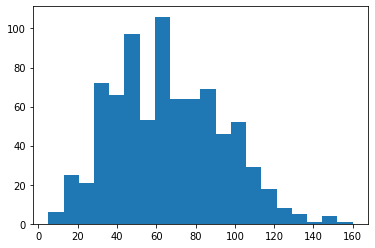

In [32]:
# using a fixed number of bins
plt.hist(data=pokemon, x='speed', bins=20)

Using a dynamic number of bins

In [35]:
# using a dynamic number of bins
## create bins with step-size 5
np.arange(0, pokemon.speed.max(), 5)

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155])

Notice that it didn't add the last value as normal Python `range` would. We need to add 5 to the end.

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <BarContainer object of 32 artists>)

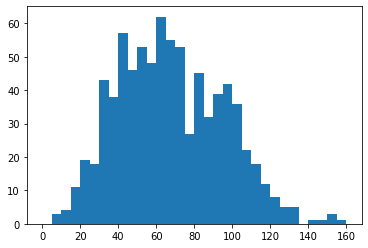

In [39]:
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data=pokemon, x='speed', bins=bins)
# note that not adding the semicolon was intentional

Using Seaborn's histplot

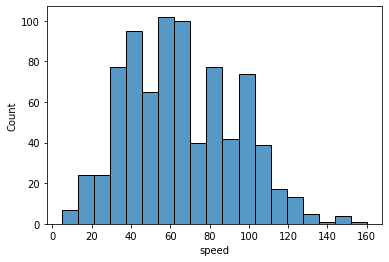

In [48]:
sns.histplot(pokemon['speed']);

Plot two histograms side-by-side

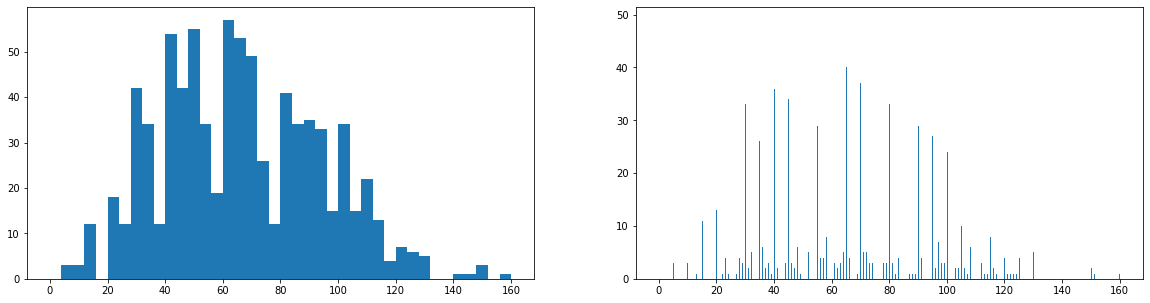

In [51]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

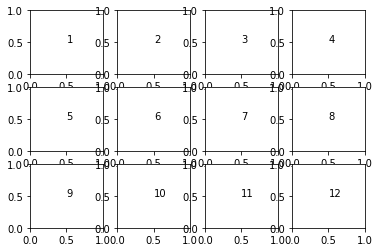

In [52]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes